In [1]:
##This is an analysis of the Electric Vehicle market in Washington between 2010-2020.
#During this analysis we explore different characteristics of an EV dataset including
#Number of EVs produced, the Electric Range of EVs and how it compares across different Makes
#and Types, Clean Alternative Fuel Vehicles, and how the MSRP is effected by Electric Range.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
file_path = 'Datasets/EV_Population.csv'
df = pd.read_csv(file_path)
df = df[df['Model Year'].astype(int) >= 2000]
df = df.sort_values(by='Model Year')
df

,State,Model Year,Make,Electric Vehicle Type,Electric Range,Base MSRP,Legislative District,CAFV Eligibility Simple
75998,WA,2000,FORD,BEV,58,0,42.0,Eligible
26754,WA,2000,FORD,BEV,58,0,22.0,Eligible
58014,WA,2000,FORD,BEV,58,0,42.0,Eligible
24265,WA,2000,FORD,BEV,58,0,36.0,Eligible
83440,WA,2000,FORD,BEV,58,0,40.0,Eligible
...,...,...,...,...,...,...,...,...
46852,WA,2025,KIA,PHEV,34,0,17.0,Eligible
13703,WA,2025,KIA,PHEV,34,0,43.0,Eligible
71054,WA,2025,BMW,PHEV,40,0,49.0,Eligible
12410,WA,2025,BMW,PHEV,40,0,36.0,Eligible


In [4]:
years = df['Model Year'].unique()

In [5]:
##Calculating the mean Electric Range of all vehicles and number of vehicles manufactured 
#for each year
df_range_avg_yr_all = df.groupby('Model Year').agg({'Electric Range': 'mean', 'State': 'count'})
df_range_avg_yr_all = df_range_avg_yr_all.reset_index()
df_range_avg_yr_all.rename(columns = {'Electric Range': 'Electric Range AVG', 'State': 'Number of EVs'}, inplace=True)
df_range_avg_yr_all['Year_Number_of_EVs_Combined'] = df_range_avg_yr_all['Model Year'].astype(str) + ' (' + df_range_avg_yr_all['Number of EVs'].astype(str) + ' EVs)'
print(df_range_avg_yr_all)

    Model Year  Electric Range AVG  Number of EVs Year_Number_of_EVs_Combined
0         2000           58.000000              7                2000 (7 EVs)
1         2002           95.000000              2                2002 (2 EVs)
2         2003           95.000000              1                2003 (1 EVs)
3         2008          220.000000             22               2008 (22 EVs)
4         2010          226.875000             24               2010 (24 EVs)
5         2011           70.895115            696              2011 (696 EVs)
6         2012           61.267146           1531             2012 (1531 EVs)
7         2013           80.155786           4243             2013 (4243 EVs)
8         2014           79.681328           3433             2014 (3433 EVs)
9         2015           96.708858           4685             2015 (4685 EVs)
10        2016          101.882342           5431             2016 (5431 EVs)
11        2017          116.345430           8294             20

In [6]:
##Filtering out years we are excluding from our analysis
df_range_avg_yr_all_2010_2020 = df_range_avg_yr_all[(df_range_avg_yr_all['Model Year'].astype(int) >= 2010) & (df_range_avg_yr_all['Model Year'].astype(int) < 2021)]
print(df_range_avg_yr_all_2010_2020)

    Model Year  Electric Range AVG  Number of EVs Year_Number_of_EVs_Combined
4         2010          226.875000             24               2010 (24 EVs)
5         2011           70.895115            696              2011 (696 EVs)
6         2012           61.267146           1531             2012 (1531 EVs)
7         2013           80.155786           4243             2013 (4243 EVs)
8         2014           79.681328           3433             2014 (3433 EVs)
9         2015           96.708858           4685             2015 (4685 EVs)
10        2016          101.882342           5431             2016 (5431 EVs)
11        2017          116.345430           8294             2017 (8294 EVs)
12        2018          156.657661          14214            2018 (14214 EVs)
13        2019          175.815906          10826            2019 (10826 EVs)
14        2020          239.213200          12167            2020 (12167 EVs)


In [7]:
#Calculating the mean Electric Range and number of vehicles by EV type manufactured 
#for each year
df_range_avg_yr_type = df.groupby(['Model Year','Electric Vehicle Type']).agg({'Electric Range': 'mean', 'State': 'count'})
df_range_avg_yr_type = df_range_avg_yr_type.reset_index()
df_range_avg_yr_type.rename(columns = {'Electric Range': 'Electric Range AVG', 'State': 'Number of EVs'}, inplace=True)
df_range_avg_yr_type['Year_Num_EVs_type_Combined'] = df_range_avg_yr_type['Model Year'].astype(str) + ' (' + df_range_avg_yr_type['Number of EVs'].astype(str) + ' ' + df_range_avg_yr_type['Electric Vehicle Type'] +'s)'
df_range_avg_yr_type

,Model Year,Electric Vehicle Type,Electric Range AVG,Number of EVs,Year_Num_EVs_type_Combined
0,2000,BEV,58.000000,7,2000 (7 BEVs)
1,2002,BEV,95.000000,2,2002 (2 BEVs)
2,2003,BEV,95.000000,1,2003 (1 BEVs)
3,2008,BEV,220.000000,22,2008 (22 BEVs)
4,2010,BEV,245.000000,21,2010 (21 BEVs)
5,2010,PHEV,100.000000,3,2010 (3 PHEVs)
6,2011,BEV,75.036859,624,2011 (624 BEVs)
7,2011,PHEV,35.000000,72,2011 (72 PHEVs)
8,2012,BEV,108.060172,698,2012 (698 BEVs)
9,2012,PHEV,22.057623,833,2012 (833 PHEVs)


In [8]:
##Filtering out years we are excluding from our analysis
df_range_avg_yr_type_filtered = df_range_avg_yr_type[(df_range_avg_yr_type['Model Year'].astype(int) >= 2010) & (df_range_avg_yr_type['Model Year'].astype(int) < 2021)]
df_range_avg_yr_type_filtered

,Model Year,Electric Vehicle Type,Electric Range AVG,Number of EVs,Year_Num_EVs_type_Combined
4,2010,BEV,245.000000,21,2010 (21 BEVs)
5,2010,PHEV,100.000000,3,2010 (3 PHEVs)
6,2011,BEV,75.036859,624,2011 (624 BEVs)
7,2011,PHEV,35.000000,72,2011 (72 PHEVs)
8,2012,BEV,108.060172,698,2012 (698 BEVs)
9,2012,PHEV,22.057623,833,2012 (833 PHEVs)
10,2013,BEV,110.546191,2717,2013 (2717 BEVs)
11,2013,PHEV,26.046527,1526,2013 (1526 PHEVs)
12,2014,BEV,128.041243,1673,2014 (1673 BEVs)
13,2014,PHEV,33.711932,1760,2014 (1760 PHEVs)


In [9]:
##Filtering for only Battery Operated EVs
df_range_avg_yr_type_bev = df_range_avg_yr_type_filtered[df_range_avg_yr_type_filtered['Electric Vehicle Type'] == 'BEV']
df_range_avg_yr_type_bev

,Model Year,Electric Vehicle Type,Electric Range AVG,Number of EVs,Year_Num_EVs_type_Combined
4,2010,BEV,245.000000,21,2010 (21 BEVs)
6,2011,BEV,75.036859,624,2011 (624 BEVs)
8,2012,BEV,108.060172,698,2012 (698 BEVs)
10,2013,BEV,110.546191,2717,2013 (2717 BEVs)
12,2014,BEV,128.041243,1673,2014 (1673 BEVs)
14,2015,BEV,120.276946,3405,2015 (3405 BEVs)
16,2016,BEV,136.768276,3707,2016 (3707 BEVs)
18,2017,BEV,186.851877,4368,2017 (4368 BEVs)
20,2018,BEV,210.798197,9871,2018 (9871 BEVs)
22,2019,BEV,209.499772,8782,2019 (8782 BEVs)


In [10]:
##Filtering for only Plug-in Hybrid EVs
df_range_avg_yr_type_phev = df_range_avg_yr_type_filtered[df_range_avg_yr_type_filtered['Electric Vehicle Type'] == 'PHEV']
df_range_avg_yr_type_phev

,Model Year,Electric Vehicle Type,Electric Range AVG,Number of EVs,Year_Num_EVs_type_Combined
5,2010,PHEV,100.000000,3,2010 (3 PHEVs)
7,2011,PHEV,35.000000,72,2011 (72 PHEVs)
9,2012,PHEV,22.057623,833,2012 (833 PHEVs)
11,2013,PHEV,26.046527,1526,2013 (1526 PHEVs)
13,2014,PHEV,33.711932,1760,2014 (1760 PHEVs)
15,2015,PHEV,34.014063,1280,2015 (1280 PHEVs)
17,2016,PHEV,26.869490,1724,2016 (1724 PHEVs)
19,2017,PHEV,37.901172,3926,2017 (3926 PHEVs)
21,2018,PHEV,33.604191,4343,2018 (4343 PHEVs)
23,2019,PHEV,31.093933,2044,2019 (2044 PHEVs)


In [11]:
##Calculating the mean Electric Range and number of vehicles by Make manufactured for each year
df_range_avg_yr_make = df.groupby(['Model Year','Make']).agg({'Electric Range': 'mean', 'State': 'count'})
df_range_avg_yr_make = df_range_avg_yr_make.reset_index()
df_range_avg_yr_make.rename(columns = {'Electric Range': 'Electric Range AVG', 'State': 'Number of EVs'}, inplace=True)
df_range_avg_yr_make['Year_Num_EVs_Make_Combined'] = df_range_avg_yr_make['Model Year'].astype(str) + ' (' + df_range_avg_yr_make['Number of EVs'].astype(str) + ' EVs)'
df_range_avg_yr_make

,Model Year,Make,Electric Range AVG,Number of EVs,Year_Num_EVs_Make_Combined
0,2000,FORD,58.000000,7,2000 (7 EVs)
1,2002,TOYOTA,95.000000,2,2002 (2 EVs)
2,2003,TOYOTA,95.000000,1,2003 (1 EVs)
3,2008,TESLA,220.000000,22,2008 (22 EVs)
4,2010,TESLA,245.000000,21,2010 (21 EVs)
...,...,...,...,...,...
215,2025,LINCOLN,27.000000,1,2025 (1 EVs)
216,2025,MAZDA,26.000000,100,2025 (100 EVs)
217,2025,MERCEDES-BENZ,50.517857,56,2025 (56 EVs)
218,2025,MITSUBISHI,38.000000,3,2025 (3 EVs)


In [12]:
##Filtering out years we are excluding from our analysis
df_range_avg_yr_make_filtered = df_range_avg_yr_make[(df_range_avg_yr_make['Model Year'].astype(int) >= 2010) & (df_range_avg_yr_make['Model Year'].astype(int) < 2021)]
df_range_avg_yr_make_filtered

,Model Year,Make,Electric Range AVG,Number of EVs,Year_Num_EVs_Make_Combined
4,2010,TESLA,245.000000,21,2010 (21 EVs)
5,2010,WHEEGO ELECTRIC CARS,100.000000,3,2010 (3 EVs)
6,2011,AZURE DYNAMICS,56.000000,4,2011 (4 EVs)
7,2011,CHEVROLET,35.000000,72,2011 (72 EVs)
8,2011,NISSAN,73.000000,608,2011 (608 EVs)
...,...,...,...,...,...
136,2020,NISSAN,177.686614,635,2020 (635 EVs)
137,2020,PORSCHE,156.644809,183,2020 (183 EVs)
138,2020,TESLA,297.195824,7088,2020 (7088 EVs)
139,2020,TOYOTA,25.000000,379,2020 (379 EVs)


In [13]:
make_years = df_range_avg_yr_make_filtered['Model Year'].unique()

In [14]:
##Initializing lists, columns, and dataframe that we will use to insert ranks into
df_columns = df_range_avg_yr_make_filtered.columns.tolist()
rank_data = []
rank_columns = ['Number of EVs for year rank', 'Electric Range AVG for year rank']
final_rank_columns = df_columns.append(rank_columns)
final_rank_df = pd.DataFrame(columns=final_rank_columns, dtype=object)

In [15]:
##Looping through each year and ranking the number of EVs produced, and the Electric Range avg
#for each Make that year. Then adding the data into the pre-initialized list, and final rank 
#dataframe to be used later.
for x in make_years:
# Filter for the specified year
    df_filtered = df_range_avg_yr_make_filtered[df_range_avg_yr_make_filtered['Model Year'] == x]

    df_filtered['Number of EVs for year rank'] = df_filtered['Number of EVs'].rank(method='min', ascending=False).astype(int)
    df_filtered['Electric Range AVG for year rank'] = df_filtered['Electric Range AVG'].rank(method='min', ascending=False).astype(int)

    for index, row in df_filtered.iterrows():
        rank_data.append(row)

final_rank_df = pd.DataFrame(rank_data)
final_rank_df

,Model Year,Make,Electric Range AVG,Number of EVs,Year_Num_EVs_Make_Combined,Number of EVs for year rank,Electric Range AVG for year rank
4,2010,TESLA,245.000000,21,2010 (21 EVs),1,1
5,2010,WHEEGO ELECTRIC CARS,100.000000,3,2010 (3 EVs),2,2
6,2011,AZURE DYNAMICS,56.000000,4,2011 (4 EVs),5,4
7,2011,CHEVROLET,35.000000,72,2011 (72 EVs),2,5
8,2011,NISSAN,73.000000,608,2011 (608 EVs),1,3
...,...,...,...,...,...,...,...
136,2020,NISSAN,177.686614,635,2020 (635 EVs),3,6
137,2020,PORSCHE,156.644809,183,2020 (183 EVs),11,7
138,2020,TESLA,297.195824,7088,2020 (7088 EVs),1,1
139,2020,TOYOTA,25.000000,379,2020 (379 EVs),5,13


In [16]:
##df filtering for the make with the most EVs produced for each year
top_ev_number = final_rank_df[final_rank_df['Number of EVs for year rank'] == 1]
top_ev_number.sort_values(by='Model Year', inplace=True)
top_ev_number

,Model Year,Make,Electric Range AVG,Number of EVs,Year_Num_EVs_Make_Combined,Number of EVs for year rank,Electric Range AVG for year rank
4,2010,TESLA,245.000000,21,2010 (21 EVs),1,1
8,2011,NISSAN,73.000000,608,2011 (608 EVs),1,3
15,2012,NISSAN,73.000000,513,2012 (513 EVs),1,3
21,2013,NISSAN,75.000000,1794,2013 (1794 EVs),1,3
27,2014,CHEVROLET,41.522472,712,2014 (712 EVs),1,8
44,2015,NISSAN,84.000000,1739,2015 (1739 EVs),1,4
63,2016,TESLA,205.890497,1589,2016 (1589 EVs),1,1
69,2017,CHEVROLET,147.699301,2860,2017 (2860 EVs),1,2
97,2018,TESLA,221.545246,7835,2018 (7835 EVs),1,1
118,2019,TESLA,229.150131,4576,2019 (4576 EVs),1,2


In [17]:
##df filtering for the make with the highest Electric Range avg for each year
top_ev_range = final_rank_df[final_rank_df['Electric Range AVG for year rank'] == 1]
top_ev_range.sort_values(by='Model Year', inplace=True)
top_ev_range

,Model Year,Make,Electric Range AVG,Number of EVs,Year_Num_EVs_Make_Combined,Number of EVs for year rank,Electric Range AVG for year rank
4,2010,TESLA,245.000000,21,2010 (21 EVs),1,1
9,2011,TESLA,245.000000,7,2011 (7 EVs),3,1
16,2012,TESLA,265.000000,128,2012 (128 EVs),4,1
23,2013,TESLA,208.000000,715,2013 (715 EVs),3,1
36,2014,TESLA,208.000000,609,2014 (609 EVs),3,1
47,2015,TESLA,208.000000,1002,2015 (1002 EVs),2,1
63,2016,TESLA,205.890497,1589,2016 (1589 EVs),1,1
78,2017,TESLA,206.399756,1636,2017 (1636 EVs),2,1
97,2018,TESLA,221.545246,7835,2018 (7835 EVs),1,1
109,2019,JAGUAR,234.000000,117,2019 (117 EVs),14,1


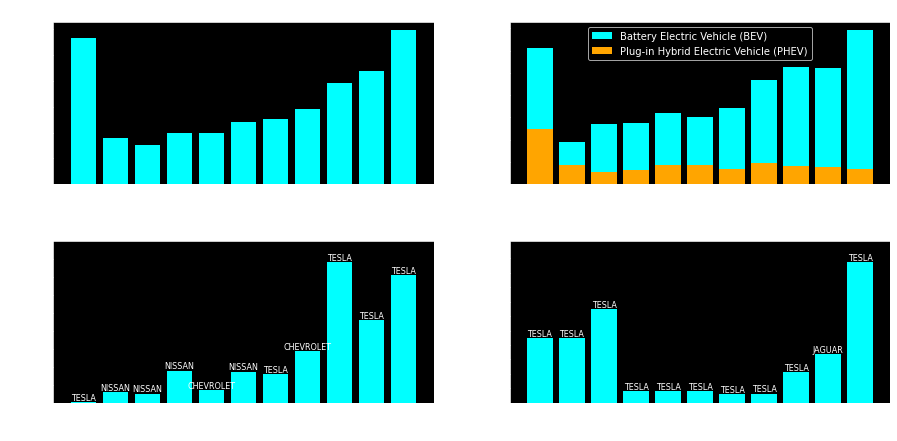

In [18]:
plt.style.use('dark_background')

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,7))

y_ticks_1 = (0, 40, 80, 120, 160, 200, 240)
ax[0,0].bar(df_range_avg_yr_all_2010_2020['Model Year'], df_range_avg_yr_all_2010_2020['Electric Range AVG'], color='cyan')
ax[0,0].set_yticks(y_ticks_1)
ax[0,0].set_yticklabels(y_ticks_1)
ax[0,0].set_ylabel("Electric Range Avg (in miles)")
ax[0,0].set_xticks(df_range_avg_yr_all_2010_2020['Model Year'])
ax[0,0].set_xticklabels(df_range_avg_yr_all_2010_2020['Model Year'])
ax[0,0].set_xlabel("Model Year")
ax[0,0].title.set_text('Electric range Avg for all EVs')

y_ticks_2 = (0, 40, 80, 120, 160, 200, 240, 280)
width = 0.4
ax[0,1].bar(df_range_avg_yr_type_bev['Model Year'], df_range_avg_yr_type_bev['Electric Range AVG'], color='cyan') 
ax[0,1].bar(df_range_avg_yr_type_phev['Model Year'], df_range_avg_yr_type_phev['Electric Range AVG'], color='orange') 
ax[0,1].set_yticks(y_ticks_2)
ax[0,1].set_yticklabels(y_ticks_2)
ax[0,1].set_ylabel("Electric Range Avg (in miles)")
ax[0,1].set_xticks(df_range_avg_yr_type_bev['Model Year'])
ax[0,1].set_xticklabels(df_range_avg_yr_type_bev['Model Year'])
ax[0,1].set_xlabel("Model Year")
ax[0,1].legend(["Battery Electric Vehicle (BEV)", "Plug-in Hybrid Electric Vehicle (PHEV)"],loc="upper center", ncol=1)
ax[0,1].title.set_text('Electric range Avg for EVs by type')

y_ticks_3 = (0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000)
width = 0.2
bars_ev_num = ax[1,0].bar(top_ev_number['Model Year'], top_ev_number['Number of EVs'], color='cyan')
ax[1,0].set_yticks(y_ticks_3)
ax[1,0].set_yticklabels(y_ticks_3)
ax[1,0].set_ylabel("Number of EVs Manufactured")
ax[1,0].set_xticks(top_ev_number['Model Year'])
ax[1,0].set_xticklabels(top_ev_number['Model Year'])
ax[1,0].set_xlabel("Model Year")
ax[1,0].title.set_text('Top number of EVs manufactured per year')

for bar, make in zip(bars_ev_num, top_ev_number['Make']):
    height = bar.get_height()
    ax[1,0].text(bar.get_x() + bar.get_width() / 2, height, make, ha='center', va='bottom', fontsize=8)

y_ticks_4 = (200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300)
width = 0.2
bars_ev_range = ax[1,1].bar(top_ev_range['Model Year'], top_ev_range['Electric Range AVG'], color='cyan')
ax[1,1].set_yticks(y_ticks_4)
ax[1,1].set_ylim(200)
ax[1,1].set_yticklabels(y_ticks_4)
ax[1,1].set_ylabel("Electric Range Avg (in miles)")
ax[1,1].set_xticks(top_ev_range['Model Year'])
ax[1,1].set_xticklabels(top_ev_range['Model Year'])
ax[1,1].set_xlabel("Model Year")
ax[1,1].title.set_text('Top electric range Avg per year')

for bar, make in zip(bars_ev_range, top_ev_range['Make']):
    height = bar.get_height()
    ax[1,1].text(bar.get_x() + bar.get_width() / 2, height, make, ha='center', va='bottom', fontsize=8)

plt.subplots_adjust(hspace=0.35)
plt.show()

##Below I have plotted the different data we have compiled and filtered in the above code.

##Top left: From this chart we can see that in general, Range averages have been steadily 
#increasing since 2011. In 2010 we see that the Range avg for all EVs is much higher than 
#subsequent years. If we look at the chart in the bottom left, we can see that there were very
#little EVs produced. So we can most likely define this value from 2010 as an outlier. I did 
#not exclude it from the chart itself just to keep consistency with the years from the other 
#charts.

##Top right: This chart shows the Electric Range average for both types of EVs. As we can see,
#Battery Electric Vehicles consistently provide much more range than Plugin Hybrid EVs.

##Bottom left: This chart displays the Make that produced the most number of EVs for each year.
#In general, we can see a trend of more EVs being produced each year. Nissan lead other Makes
#with the amount they produced from the early to mid 2010s. Tesla took over as the leader
#in the later 2010s, while also producing a lot more than other Makes had in previous years.

##Bottom right: As we can see from this chart, Tesla has lead other Makes almost every year
#in Electric Range Avg.

In [19]:
##Filtering for CAFV Eligibile EVs (Clean Alternative Fuel Vehicle based on its battery)
#Also filtering out years we are excluding from our analysis
df_cafv_elig = df[(df['Model Year'].astype(int) >= 2010) & (df['Model Year'].astype(int) < 2021) & (df['CAFV Eligibility Simple'] == "Eligible")]
df_cafv_elig
    

,State,Model Year,Make,Electric Vehicle Type,Electric Range,Base MSRP,Legislative District,CAFV Eligibility Simple
56006,WA,2010,TESLA,BEV,245,110950,21.0,Eligible
69246,WA,2010,TESLA,BEV,245,110950,10.0,Eligible
28999,WA,2010,TESLA,BEV,245,110950,43.0,Eligible
91353,WA,2010,TESLA,BEV,245,110950,28.0,Eligible
38172,WA,2010,TESLA,BEV,245,110950,48.0,Eligible
...,...,...,...,...,...,...,...,...
37691,WA,2020,TESLA,BEV,293,0,46.0,Eligible
60129,WA,2020,TESLA,BEV,266,0,12.0,Eligible
21059,WA,2020,NISSAN,BEV,149,0,18.0,Eligible
42169,WA,2020,TESLA,BEV,291,0,46.0,Eligible


In [20]:
##Summing the number of CAFV Eligible vehicles from each Make
df_cafv_elig_make = df_cafv_elig.groupby('Make').agg({'CAFV Eligibility Simple': 'count'})
df_cafv_elig_make = df_cafv_elig_make.reset_index()
df_cafv_elig_make.rename(columns = {'CAFV Eligibility Simple': 'Number of EVs CAFV Eligible'}, inplace=True)
df_cafv_elig_make['Make_number_of_eligible_combined'] = df_cafv_elig_make['Make'].astype(str) + ' (' + df_cafv_elig_make['Number of EVs CAFV Eligible'].astype(str) + ' EVs)'

df_cafv_elig_make['Number of EVs CAFV Eligible rank'] = df_cafv_elig_make['Number of EVs CAFV Eligible'].rank(method='min', ascending=False).astype(int)
df_cafv_elig_make

,Make,Number of EVs CAFV Eligible,Make_number_of_eligible_combined,Number of EVs CAFV Eligible rank
0,AUDI,537,AUDI (537 EVs),10
1,AZURE DYNAMICS,4,AZURE DYNAMICS (4 EVs),22
2,BMW,1881,BMW (1881 EVs),4
3,CADILLAC,91,CADILLAC (91 EVs),16
4,CHEVROLET,9697,CHEVROLET (9697 EVs),3
5,CHRYSLER,935,CHRYSLER (935 EVs),7
6,FIAT,558,FIAT (558 EVs),9
7,FISKER,11,FISKER (11 EVs),20
8,FORD,231,FORD (231 EVs),13
9,HONDA,829,HONDA (829 EVs),8


In [21]:
##Top 5 CAFV Elligible Makes
df_cafv_elig_make_top_5 = df_cafv_elig_make[df_cafv_elig_make['Number of EVs CAFV Eligible rank'] <= 5]
df_cafv_elig_make_top_5

,Make,Number of EVs CAFV Eligible,Make_number_of_eligible_combined,Number of EVs CAFV Eligible rank
2,BMW,1881,BMW (1881 EVs),4
4,CHEVROLET,9697,CHEVROLET (9697 EVs),3
12,KIA,1492,KIA (1492 EVs),5
15,NISSAN,10406,NISSAN (10406 EVs),2
18,TESLA,25206,TESLA (25206 EVs),1


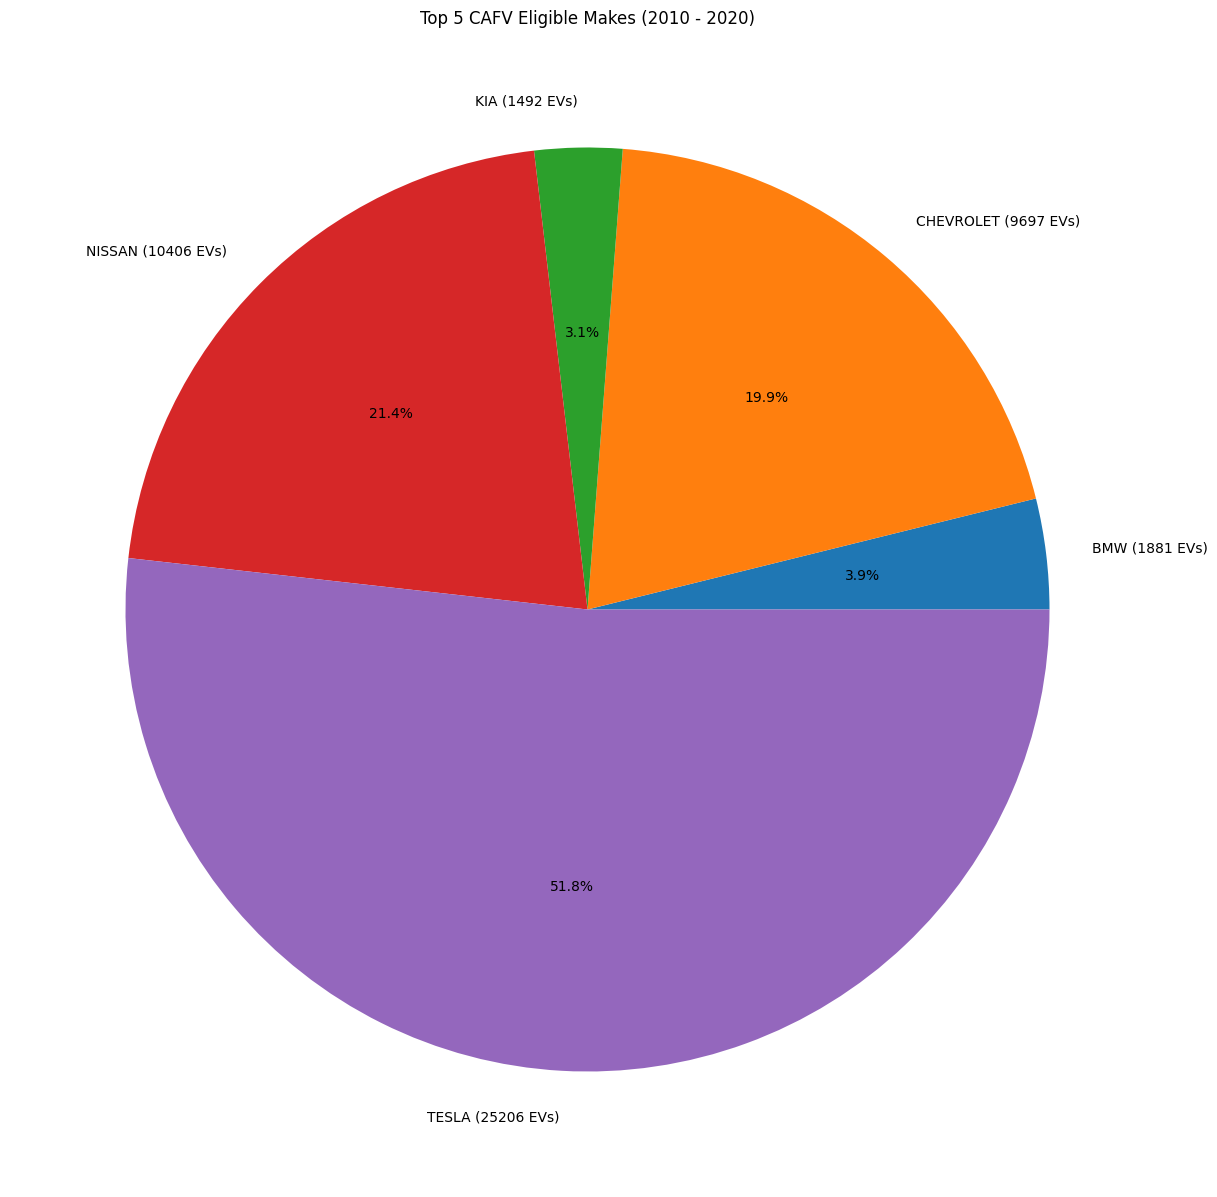

In [22]:
plt.style.use('default')
fig2, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))

ax2.pie(df_cafv_elig_make_top_5['Number of EVs CAFV Eligible'], labels=df_cafv_elig_make_top_5['Make_number_of_eligible_combined'], autopct='%1.1f%%',textprops={'color':"black"})
ax2.set_title('Top 5 CAFV Eligible Makes (2010 - 2020)',color='black')
plt.suptitle('')
plt.show()

##CAFV Elligible - Indicates if the vehicle qualifies for the Clean Alternative Fuel Vehicle
#program based on its battery

##As we see from the Pie Chart below, Tesla has produced by far the most CAFV Elligible EVs.
#Nissan and Chevrolet are 2nd and 3rd, producing almost the same amount as each other.

In [23]:
##This dataset had some records that had 0 for their MSRP values. We are excluding those
#for this analysis. Also filtering out years we are exclduing from our analysis.
df_msrp_no_zeros = df[(df['Base MSRP']>0) & (df['Model Year'].astype(int) >= 2010) & (df['Model Year'].astype(int) < 2021)]
df_msrp_no_zeros

,State,Model Year,Make,Electric Vehicle Type,Electric Range,Base MSRP,Legislative District,CAFV Eligibility Simple
56006,WA,2010,TESLA,BEV,245,110950,21.0,Eligible
69246,WA,2010,TESLA,BEV,245,110950,10.0,Eligible
28999,WA,2010,TESLA,BEV,245,110950,43.0,Eligible
91353,WA,2010,TESLA,BEV,245,110950,28.0,Eligible
38172,WA,2010,TESLA,BEV,245,110950,48.0,Eligible
...,...,...,...,...,...,...,...,...
49928,WA,2020,PORSCHE,PHEV,14,81100,37.0,Not Eligible
24364,WA,2020,PORSCHE,PHEV,14,81100,46.0,Not Eligible
38284,WA,2020,PORSCHE,PHEV,14,81100,14.0,Not Eligible
32491,WA,2020,PORSCHE,PHEV,14,81100,48.0,Not Eligible


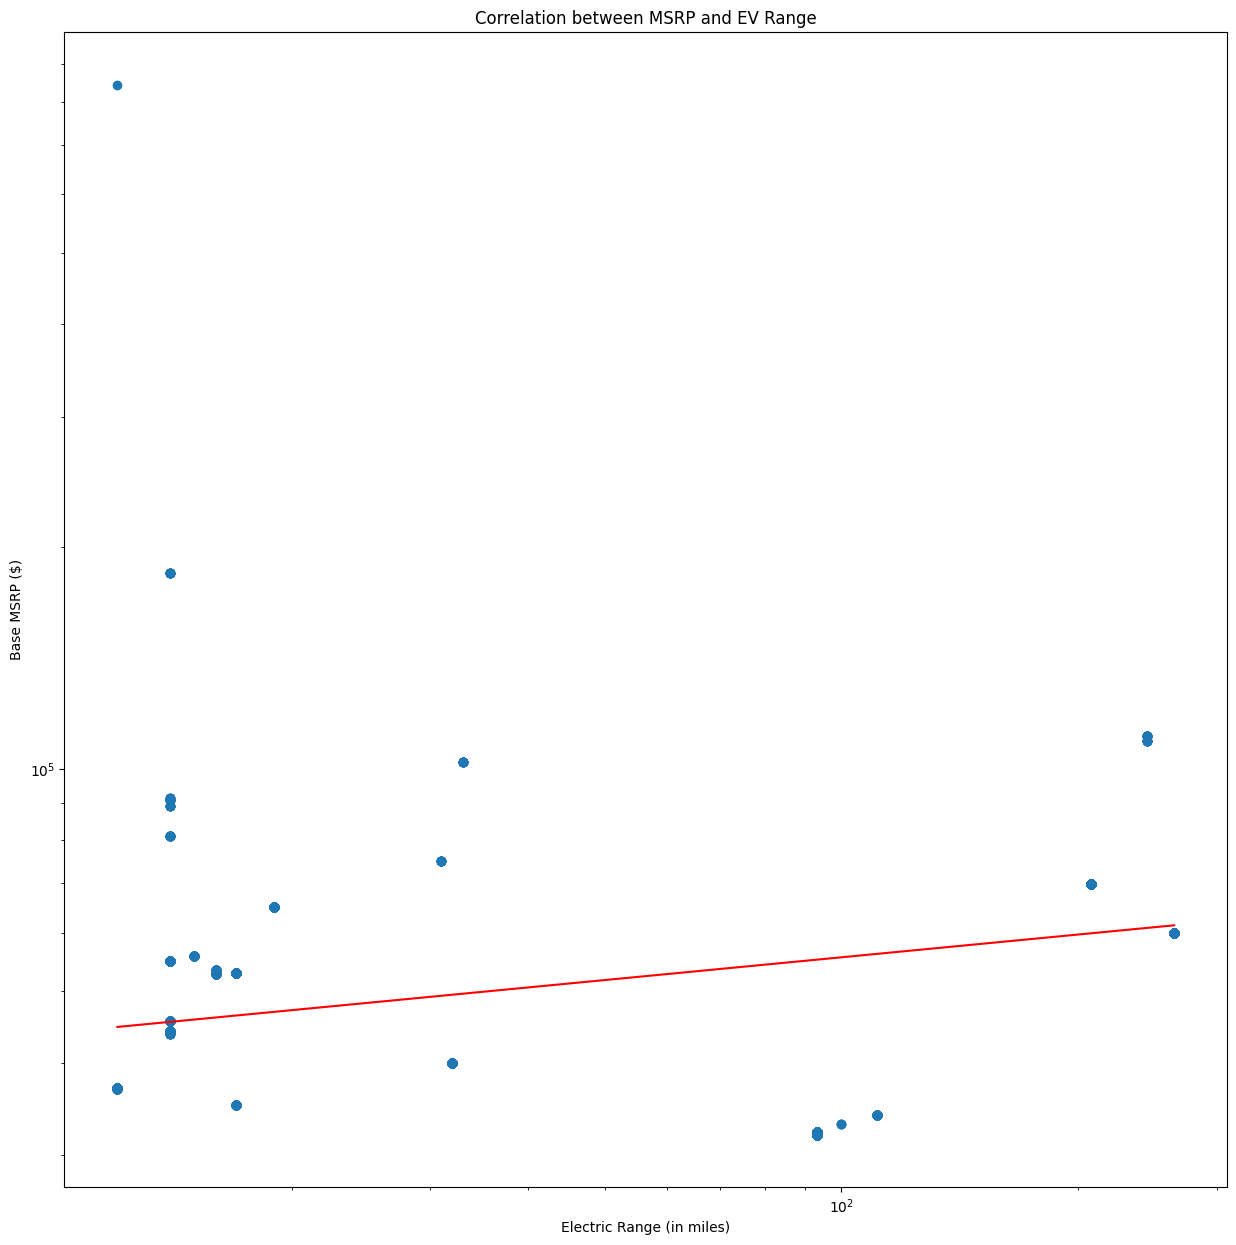

In [24]:
fig3, ax3 = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))

##calculting coefficients for the trend line. I am doing this because I am using 
#a logarithmic scale due to some data being very spread out.
co = np.polyfit(np.log(df_msrp_no_zeros['Electric Range']), np.log(df_msrp_no_zeros['Base MSRP']), 1)

ax3.scatter(df_msrp_no_zeros['Electric Range'], df_msrp_no_zeros['Base MSRP'])
ax3.set_xscale('log')
ax3.set_yscale('log')

##Trend line setup and plotting
xfit = np.linspace(min(df_msrp_no_zeros['Electric Range']), max(df_msrp_no_zeros['Electric Range']), 100)
yfit = np.exp(co[1]) * xfit**co[0]
ax3.plot(xfit, yfit, 'r-')

ax3.set_xlabel('Electric Range (in miles)')
ax3.set_ylabel('Base MSRP ($)')
ax3.set_title('Correlation between MSRP and EV Range')
plt.show()

##I used the below plot to see if there was any sort of correlation between Electric Range
#and MSRP. The trend line shows a positive correlation between the two, but not as strong as I
#would have thought.